# Client: ABC Tech

## Business Case:
ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets, which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.

ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor. Machine Learning as way to improve ITSM processes ABC Tech management recently attended Machine Learning conference on ML for ITSM. Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.

1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## Importing basic libraries

In [1]:
pip install mysql-connector-python

In [2]:
import mysql.connector
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [3]:
# connecting to database server
connector = mysql.connector.connect(host = '18.136.157.135',
                                    username = 'dm_team',
                                    password = 'DM!$Team@&27920!',
                                    database = 'project_itsm')

In [4]:
database_tables = pd.read_sql_query('show tables', connector)
print(database_tables)

  Tables_in_project_itsm
0           dataset_list


In [5]:
query = 'select * from dataset_list'
df=pd.read_sql(query,connector)

In [6]:
df = df.replace('', pd.NA)

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,<NA>,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,<NA>,<NA>
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,<NA>,<NA>
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,<NA>,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,<NA>,<NA>,<NA>
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,<NA>,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,<NA>,<NA>,<NA>
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,<NA>,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,<NA>,<NA>,<NA>


## Basic checks

In [9]:
# Getting first 5 records
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,<NA>,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,<NA>,<NA>
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,<NA>,<NA>
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,<NA>,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,<NA>,<NA>,<NA>
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,<NA>,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,<NA>,<NA>,<NA>
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,<NA>,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,<NA>,<NA>,<NA>


In [10]:
# Getting last 5 records
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,<NA>,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,<NA>,<NA>,<NA>
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,<NA>,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,<NA>,<NA>,<NA>
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,<NA>,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,<NA>,<NA>,<NA>
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,<NA>,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,<NA>,<NA>,<NA>
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,<NA>,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,<NA>,<NA>,<NA>


In [11]:
## Finding the shape of dataset
df.shape

(46606, 25)

### The dataset consists of 46606 records and 25 features.

In [12]:
## Quick summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46495 non-null  object
 2   CI_Subcat                   46495 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46605 non-null  ob

### There are 4 numerical features and 19 categorical features in the dataset.

In [13]:
## Finding duplicate records
df.duplicated().sum()

0

### There are no duplicate records in the dataset.


In [14]:
## Statistical information about numerical data
df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46605,46606,2284,44826,46606,46605,46146,46492,46606,1222,560,560
unique,3019,12,64,274,46606,2,6,6,6,46606,4,1825,1,41,34636,2244,33627,34528,30638,14,49,43060,24,4,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,1,#MULTIVALUE,1,1,C00003013
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,2,7,21,236,16470,43058,3434,1057,536,110


In [15]:
## statistical information about categorical data
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46605,46606,2284,44826,46606,46605,46146,46492,46606,1222,560,560
unique,3019,12,64,274,46606,2,6,6,6,46606,4,1825,1,41,34636,2244,33627,34528,30638,14,49,43060,24,4,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,1,#MULTIVALUE,1,1,C00003013
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,2,7,21,236,16470,43058,3434,1057,536,110


### There are no 0.00 constant standard deviation columns.

In [16]:
ignore_columns =['CI_Name','CI_Subcat','WBS','Incident_ID','number_cnt','KB_number','Open_Time','Reopen_Time','Resolved_Time',
      'Close_Time','Handle_Time_hrs','Related_Interaction','No_of_Related_Incidents','No_of_Related_Changes','Related_Change']
print(len([column for column in df.columns if column not in ignore_columns]))
print('\n')
print([column for column in df.columns if column not in ignore_columns])

10


['CI_Cat', 'Status', 'Impact', 'Urgency', 'Priority', 'Category', 'Alert_Status', 'No_of_Reassignments', 'Closure_Code', 'No_of_Related_Interactions']


## Exploratory Data Analysis

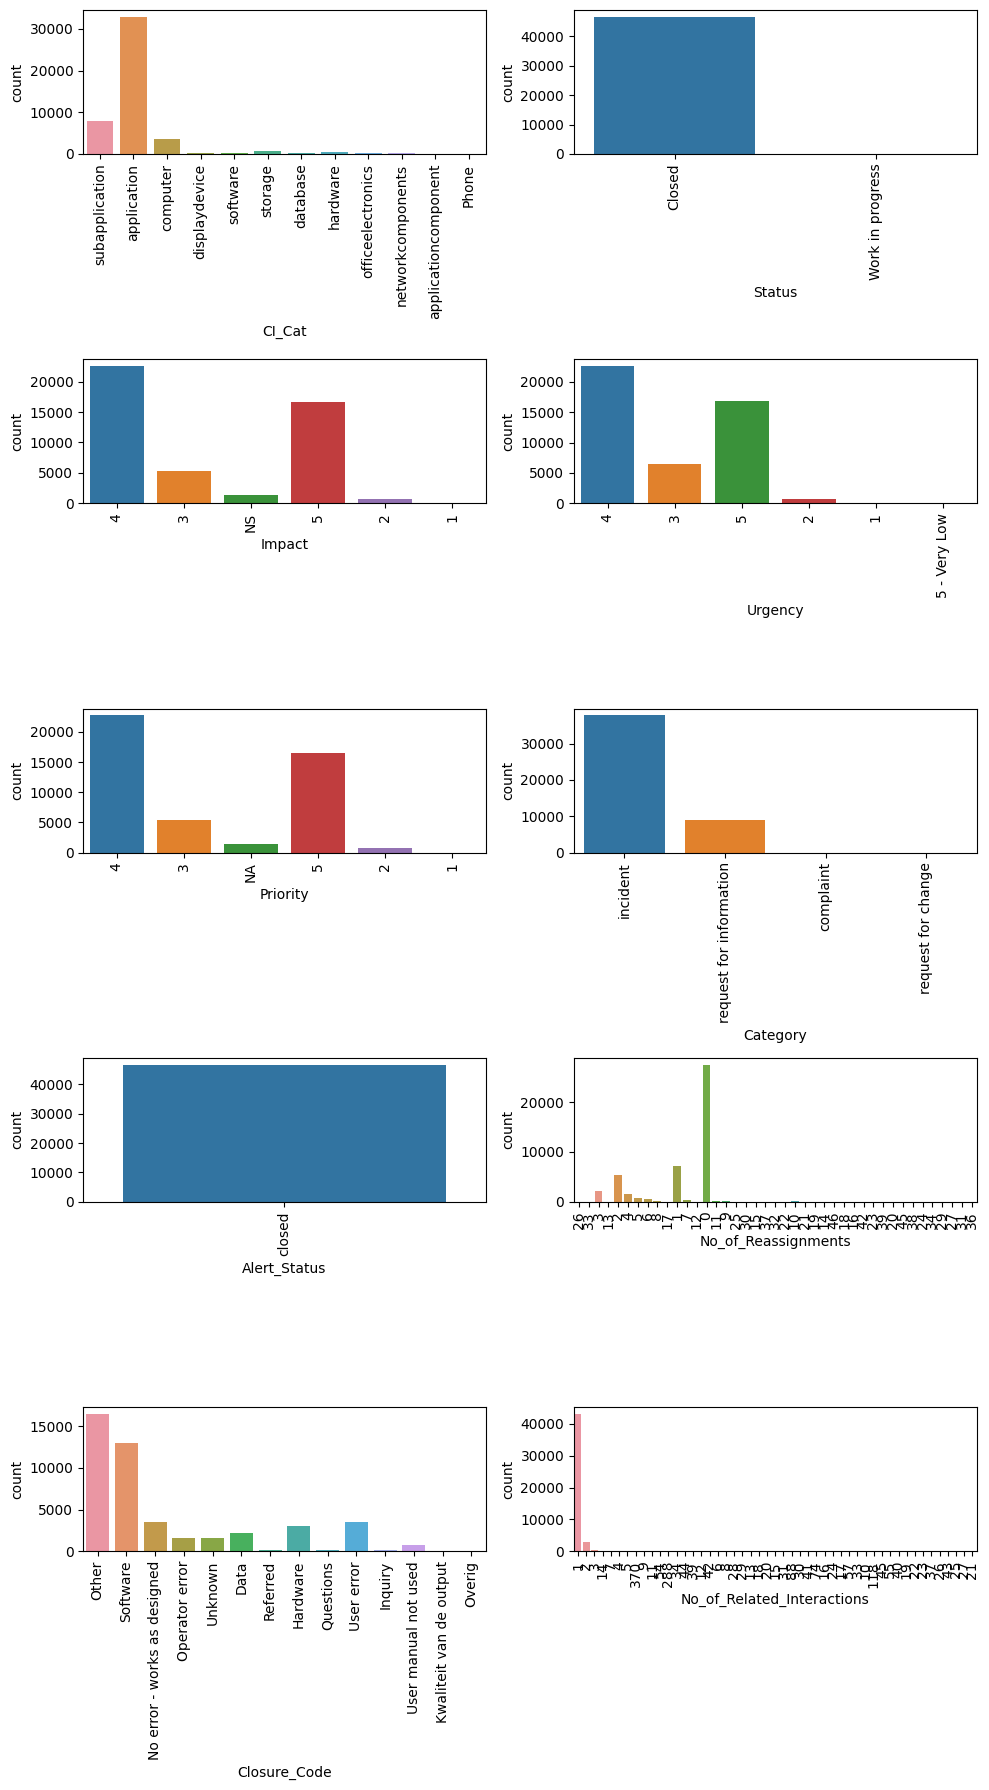

In [17]:
plt.figure(figsize=(10,18))
plotnumber = 1

for i in [column for column in df.columns if column not in ignore_columns]:

  plt.subplot(5,2,plotnumber)
  sns.countplot(x=i,data=df)
  plt.xlabel(i)
  plt.xticks(rotation=90)
  plotnumber+=1
plt.tight_layout()

## Insights

- In CI_Cat, application is having highest counts as compared to others and subapplication is the category which has 2nd highest count.

- The status of all raised tickets are closed, there are no active tickets present in the datset.

- More numbers of tickets are having impact of 4 and 5. Very fewer tickets are having less impact.

- Most of the tickets are having high priority of either 4 or 5.

# Data Pre-processing feature by feature

In [18]:
## Checking for null values
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [19]:
## Calculating the percentage of null values
null = pd.DataFrame((df.isnull().sum()/len(df))*100,columns=['per'])
null['count']=df.isnull().sum()
null

,per,count
CI_Name,0.000000,0
CI_Cat,0.238167,111
CI_Subcat,0.238167,111
WBS,0.000000,0
Incident_ID,0.000000,0
Status,0.000000,0
Impact,0.000000,0
Urgency,0.000000,0
Priority,0.000000,0
number_cnt,0.000000,0


#### The features 'Reopen_Time', 'No_of_Related_Incidents', 'No_of_Related_Changes', and 'Related_Changes' are having more than 90% of null values.
​
### So we are dropping those columns.

In [20]:
df.drop(null[null['per']>90].index,axis=1,inplace=True)

In [21]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029


### The steps involved in the feature by feature data preprocessing are:
- Checking for null values and imputing those accordingly.
- Encoding the categorical fetures using label encoder.
- Converting the data type of features to required format.

### CI_Name

In [22]:
## Checking for null values
df['CI_Name'].isnull().sum()

0

In [23]:
## Imputing the null values with mode
len(df['CI_Name'].value_counts())

3019

In [24]:
## As name has no impact on the tasks we are going to perform, we are dropping the feature.
df.drop('CI_Name',axis=1,inplace=True)

### CI_Cat

In [25]:
## Checking for null values
df['CI_Cat'].isnull().sum()

111

In [26]:
## Imputing the null values with mode
df.loc[df['CI_Cat'].isnull(),'CI_Cat']=df['CI_Cat'].mode()[0]

In [27]:
## Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [28]:
len(df['CI_Cat'].value_counts())

12

In [29]:
## Label encoding
df['CI_Cat'] = lc.fit_transform(df['CI_Cat'])

In [30]:
## Force typecasting
df['CI_Cat'] = df['CI_Cat'].astype(int)

### CI_Subcat

In [31]:
## Checking for null values
df['CI_Subcat'].isnull().sum()

111

In [32]:
len(df['CI_Subcat'].value_counts())

64

In [33]:
## Imputing the null values with mode
df.loc[df['CI_Subcat'].isnull(), 'CI_Subcat'] = df['CI_Subcat'].mode()[0]

In [34]:
## Label encoding
df['CI_Subcat'] = lc.fit_transform(df['CI_Subcat'])

In [35]:
## Force typecasting
df['CI_Subcat'] = df['CI_Subcat'].astype(int)

### WBS

In [36]:
## Checking number of unique values
len(df['WBS'].unique())

274

In [37]:
## Extracting only numericals
df['WBS'] = df['WBS'].apply(lambda x: x[-3:])

In [38]:
df['WBS']

0        162
1        088
2        092
3        088
4        088
        ... 
46601    073
46602    073
46603    091
46604    073
46605    267
Name: WBS, Length: 46606, dtype: object

In [39]:
df['WBS']=df['WBS'].astype(int)

### Incident_ID

In [40]:
## Checking for null values
df['Incident_ID'].isnull().sum()

0

In [41]:
## Checking number of unique values
len(df['Incident_ID'].unique())

46606

- Incident ID is a unique feature and it doesn't have any impact on targets.
- So we are dropping this feature.

In [42]:
df.drop(df[['Incident_ID']], axis=1, inplace=True)

### Status

In [43]:
## Checking for null values
df['Status'].isnull().sum()

0

In [44]:
df['Status'].value_counts()

Closed              46597
Work in progress        9
Name: Status, dtype: int64

In [45]:
## Label encoding
df['Status'] = lc.fit_transform(df['Status'])

In [46]:
## Forced typecasting
df['Status'] = df['Status'].astype(int)

### Impact

In [47]:
## Checking for null values
df['Impact'].isnull().sum()

0

In [48]:
df['Impact'].value_counts()

4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: Impact, dtype: int64

In [49]:
## Imputing the null values with mode
df.loc[df['Impact']=='NS','Impact']=df['Impact'].mode()[0]

In [50]:
df['Impact'].dtype

dtype('O')

In [51]:
## Forced typecasting
df['Impact']=df['Impact'].astype(int)

In [52]:
df['Impact'].unique()

array([4, 3, 5, 2, 1])

### Urgency

In [53]:
## Checking for null values
df['Urgency'].isnull().sum()

0

In [54]:
df['Urgency'].value_counts()

4               22588
5               16779
3                6536
2                 696
1                   6
5 - Very Low        1
Name: Urgency, dtype: int64

In [55]:
df['Urgency'].unique()

array(['4', '3', '5', '2', '1', '5 - Very Low'], dtype=object)

- As only one record is having `5 - Very Low` value, let's drop it.

In [56]:
df.drop(df.loc[df['Urgency']=='5 - Very Low'].index,axis=0,inplace=True)

In [57]:
## Forced typecasting
df['Urgency'] = df['Urgency'].astype(int)

In [58]:
df['Urgency'].unique()

array([4, 3, 5, 2, 1])

### Priority

In [59]:
## Checking for null values
df['Priority'].isnull().sum()

0

In [60]:
df['Priority'].value_counts()

4     22717
5     16485
3      5323
NA     1380
2       697
1         3
Name: Priority, dtype: int64

In [61]:
df['Priority'].unique()

array(['4', '3', 'NA', '5', '2', '1'], dtype=object)

In [62]:
## Imputing the null values with mode
df.loc[df['Priority']=='NA','Priority']=df['Priority'].mode()[0]

In [63]:
## Forced typecasting
df['Priority'] = df['Priority'].astype(int)

In [64]:
df['Priority'].unique()

array([4, 3, 5, 2, 1])

### number_cnt

In [65]:
## Checking for null values
df['number_cnt'].isnull().sum()

0

In [66]:
len(df['number_cnt'].value_counts())

46605

In [67]:
## Forced typecasting
df['number_cnt'] = df['number_cnt'].astype(float)

### Category

In [68]:
## Checking for null values.
df['Category'].isnull().sum()

0

In [69]:
df['Category'].value_counts()

incident                   37748
request for information     8845
complaint                     11
request for change             1
Name: Category, dtype: int64

In [70]:
## Label encoding.
df['Category'] = lc.fit_transform(df['Category'])

In [71]:
## Forced typecasting
df['Category'] = (df['Category']).astype(int)

### KB_number

In [72]:
## Checking for null values.
df['KB_number'].isnull().sum()

0

In [73]:
len(df['KB_number'].value_counts())

1824

In [74]:
df['KB_number'] = df['KB_number'].apply(lambda x: x[-4:])

In [75]:
## Forced typecasting
df['KB_number'] = df['KB_number'].astype(int)

### Alert_Status

In [76]:
## Checking for null values.
df['Alert_Status'].isnull().sum()

0

In [77]:
df['Alert_Status'].value_counts()

closed    46605
Name: Alert_Status, dtype: int64

- All the records are in closed status, so this feature seems to have no impact on our targets.

In [78]:
df.drop('Alert_Status',axis=1,inplace=True)

### No_of_Reassignments

In [79]:
## Checking for null values.
df['No_of_Reassignments'].isnull().sum()

1

In [80]:
## Imputing the null values with mode
df.loc[df['No_of_Reassignments'].isnull(), 'No_of_Reassignments'] = df['No_of_Reassignments'].mode()[0]

In [81]:
df['No_of_Reassignments'].dtype

dtype('O')

In [82]:
len(df['No_of_Reassignments'].unique())

41

In [83]:
## Force typecasting
df['No_of_Reassignments']=df['No_of_Reassignments'].astype(int)

### Open_Time

In [84]:
## Checking for null values.
df['Open_Time'].isnull().sum()

0

In [85]:
## Forced typecasting
df['Open_Time'] = pd.to_datetime(df['Open_Time'])

### Resolved_Time

In [86]:
## Checking for null values.
df['Resolved_Time'].isnull().sum()

1780

In [87]:
## Imputing the null values with mode
df.loc[df['Resolved_Time'].isnull(), 'Resolved_Time'] = df['Resolved_Time'].mode()[0]

In [88]:
## Forced typecasting
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'])

### Close_Time

In [89]:
## Checking for null values.
df['Close_Time'].isnull().sum()

0

In [90]:
## Forced typecasting
df['Close_Time'] = pd.to_datetime(df['Close_Time'])

### Handle_Time_hrs
- The values given in this datset has no meaning.
- So we are extracting the time taken to handle the ticket using `Open_Time` and `Closed_Time`.

In [91]:
## Dropping the incorrect Handle_Time_hrs column
df.drop('Handle_Time_hrs', axis=1, inplace=True)

In [92]:
## Creating a new Handle_Time column using absolute difference of Close_Time and Open_Time
df['Conv_Handle_Time']=abs(df['Close_Time'] - df['Open_Time'])

In [93]:
## Converting the Handle_Time
c = []
for i in df['Conv_Handle_Time'].index:
    c.append((df['Conv_Handle_Time'][i].total_seconds())/3600)

In [94]:
df['Conv_Handle_Time'] = c

In [95]:
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Related_Interaction,Conv_Handle_Time
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,Other,1,SD0000007,8256.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,Software,1,SD0000011,1700.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,No error - works as designed,1,SD0000017,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,Operator error,1,SD0000025,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,Other,1,SD0000029,7370.900000


### Closure_Code

In [96]:
## Checking for null values.
df['Closure_Code'].isnull().sum()

460

In [97]:
df['Closure_Code'].value_counts()

Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3529
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: Closure_Code, dtype: int64

In [98]:
## Imputing the null values with mode.
df.loc[df['Closure_Code'].isnull(),'Closure_Code'] = df['Closure_Code'].mode()[0]

In [99]:
## Label encoding
df['Closure_Code'] = lc.fit_transform(df['Closure_Code'])

In [100]:
## Forced typecasting
df['Closure_Code'] = df['Closure_Code'].astype(int)

### No_of_Related_Interactions

In [101]:
## Checking for null values.
df['No_of_Related_Interactions'].isnull().sum()

114

In [102]:
len(df['No_of_Related_Interactions'].value_counts())

49

In [103]:
## Imputing null values with mode.
df.loc[df['No_of_Related_Interactions'].isnull(),'No_of_Related_Interactions'] = df['No_of_Related_Interactions'].mode()[0]

In [104]:
## Forced typecasting
df['No_of_Related_Interactions'] = df['No_of_Related_Interactions'].astype(int)

### Related_Interactions

In [105]:
## Checking for null values.
df['Related_Interaction'].isnull().sum()

0

In [106]:
len(df['Related_Interaction'].value_counts())

43059

In [107]:
df.drop('Related_Interaction',axis=1,inplace=True)

## Preprocessed Data

In [108]:
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Conv_Handle_Time
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,6,1,8256.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,10,1,1700.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,6,1,7370.900000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   CI_Subcat                   46605 non-null  int64         
 2   WBS                         46605 non-null  int64         
 3   Status                      46605 non-null  int64         
 4   Impact                      46605 non-null  int64         
 5   Urgency                     46605 non-null  int64         
 6   Priority                    46605 non-null  int64         
 7   number_cnt                  46605 non-null  float64       
 8   Category                    46605 non-null  int64         
 9   KB_number                   46605 non-null  int64         
 10  No_of_Reassignments         46605 non-null  int64         
 11  Open_Time                   46605 non-null  datetime64

# Task 1 : Predicting High Priority Tickets:

- To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

In [110]:
# Copying the preprocessed data
d1 = df.copy()

In [111]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   CI_Subcat                   46605 non-null  int64         
 2   WBS                         46605 non-null  int64         
 3   Status                      46605 non-null  int64         
 4   Impact                      46605 non-null  int64         
 5   Urgency                     46605 non-null  int64         
 6   Priority                    46605 non-null  int64         
 7   number_cnt                  46605 non-null  float64       
 8   Category                    46605 non-null  int64         
 9   KB_number                   46605 non-null  int64         
 10  No_of_Reassignments         46605 non-null  int64         
 11  Open_Time                   46605 non-null  datetime64

In [112]:
d1.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Conv_Handle_Time
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,6,1,8256.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,10,1,1700.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,6,1,7370.900000


## Feature Slection

- Removing irrelavent features.

In [113]:
d1.drop(d1.columns[[3, 7, 10, 11, 12, 13, 14, 15, 16]], axis=1,inplace=True)

In [114]:
d1.head()

,CI_Cat,CI_Subcat,WBS,Impact,Urgency,Priority,Category,KB_number
0,11,57,162,4,4,4,1,553
1,1,57,88,3,3,3,1,611
2,1,10,92,4,3,4,3,339
3,1,57,88,4,4,4,1,611
4,1,57,88,4,4,4,1,611


### Checking correlation among features

<Axes: >

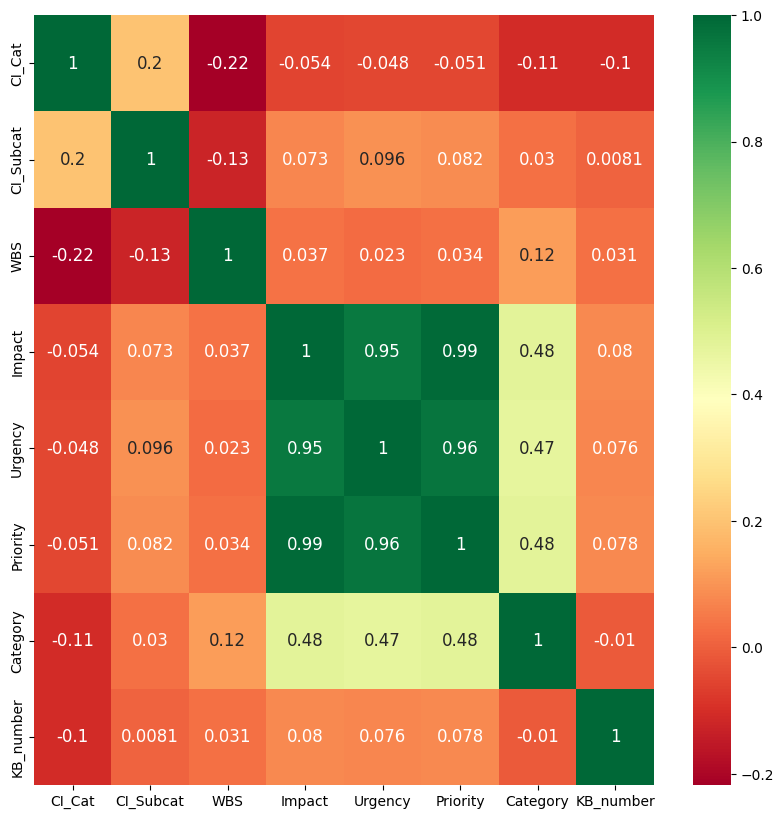

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(d1.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":12})

#### Observation
- Urgecy determine the timeframe within with the ticket needs to be resolved or fulfilled. Urgent tickets that require immidiate attention should be given higher priority.
- Impact assess the extent to which the issue or service request affects business operations or services. Hight impact issues that cause significant disruptions should be given high priority.
- The features `Impact` and `Urgency` are highly correlated with each other, having correlation value of 0.95
- As we can't keep two highly correlated features for training the model, and as the `Impact` feature is showing very high correlation with target feature as compared to Urgency, we are keeping the Impact column and dropping the Urgency column.

In [116]:
d1.drop(d1[['Urgency']], axis=1, inplace=True)

In [117]:
X = d1.drop('Priority', axis=1)
y = d1['Priority'].map({1:1,2:1,3:0,4:0,5:0})

In [118]:
X.head(3)

,CI_Cat,CI_Subcat,WBS,Impact,Category,KB_number
0,11,57,162,4,1,553
1,1,57,88,3,1,611
2,1,10,92,4,3,339


## Splitting the data  into train set and test set

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32623, 6)
(32623,)
(13982, 6)
(13982,)


## Scaling the data
- As we will be using many distance based Machine learning models and since the range of features are not in the same scale, we will scale the data

In [121]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Creation

In [122]:
### Importig the required models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
### Importing requried evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Logistic Regressor

In [124]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [125]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## K Nearest Neighbors Classifier

In [126]:
error_rate=[]
for i in range(1, 20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'error_rate')

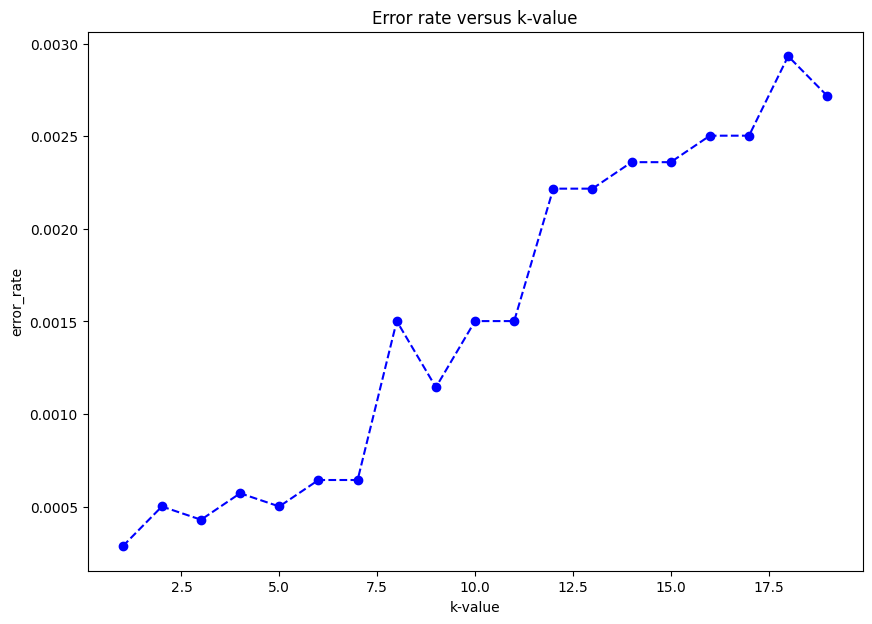

In [127]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [128]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)

In [129]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     6]
 [    0   222]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13760
           1       0.97      1.00      0.99       222

    accuracy                           1.00     13982
   macro avg       0.99      1.00      0.99     13982
weighted avg       1.00      1.00      1.00     13982



## Support Vector Classifier

In [130]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_hat = svc.predict(X_train)
y_pred = svc.predict(X_test)

In [131]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Naive Bayes Classifier

In [132]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_hat = nb.predict(X_train)
y_pred = nb.predict(X_test)

In [133]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754    10]
 [    0   218]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13764
           1       0.96      1.00      0.98       218

    accuracy                           1.00     13982
   macro avg       0.98      1.00      0.99     13982
weighted avg       1.00      1.00      1.00     13982



## Decision Tree Classifier

In [134]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [135]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Random Forest Classsifier

In [136]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [137]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Gradient Boosting Classifier

In [138]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_hat = gb.predict(X_train)
y_pred = gb.predict(X_test)

In [139]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## X Gradient Boost Classifier

In [140]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_hat = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [141]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[13754     2]
 [    0   226]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.99      1.00      1.00       226

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Evaluation Summary
- Before scaling, the basic models : Logistic regressor, KNN and SVC were giving average performance.
- After scaling, all the models are having equal performance.

In [142]:
# creating a dictionary
dict = {"Model":["Logistic Regressor","KNN","SVC", "Naive Bayes","Decision Tree","Random Forest","Gradient Boosting","XGradient Boosting"],
      "Accuracy":[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
      "Precision":[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
      "Recall":[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
      "F1 Score":[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
      "Total Misclassifications":[2, 6, 2, 10, 2, 2, 2, 2]}

In [143]:
scores = pd.DataFrame(dict)

In [144]:
score = scores.sort_values(by="Total Misclassifications", ascending=True)
score

,Model,Accuracy,Precision,Recall,F1 Score,Total Misclassifications
0,Logistic Regressor,1.0,1.0,1.0,1.0,2
2,SVC,1.0,1.0,1.0,1.0,2
4,Decision Tree,1.0,1.0,1.0,1.0,2
5,Random Forest,1.0,1.0,1.0,1.0,2
6,Gradient Boosting,1.0,1.0,1.0,1.0,2
7,XGradient Boosting,1.0,1.0,1.0,1.0,2
1,KNN,1.0,1.0,1.0,1.0,6
3,Naive Bayes,1.0,1.0,1.0,1.0,10


#### We have considered weighted average for all the above metrics.
#### From the above table we can see that though we got 100% accuracy in all the models, yet there are few misclassifications.
#### We will choose the model which have least misclassifications as the best model.

In [145]:
## Feature impotances in decision tree
dt.feature_importances_

array([0.00000000e+00, 1.04232015e-05, 7.20951193e-05, 9.99131902e-01,
       0.00000000e+00, 7.85579673e-04])

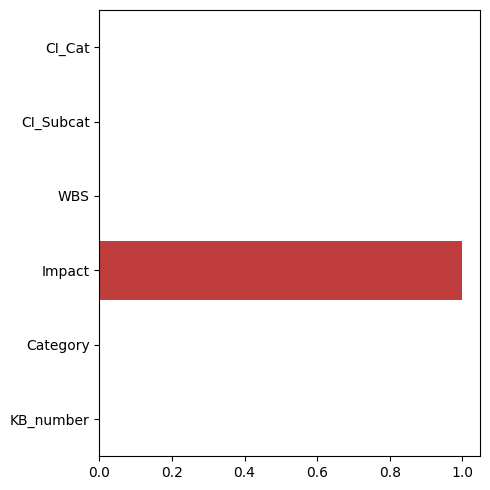

In [146]:
plt.figure(figsize=(5,5))
sns.barplot(x=dt.feature_importances_,y=X.columns)
plt.tight_layout()

### It's not a good approach to relay only on single feature to predict the target while using decision tree.

In [147]:
## Feature importances in random forest
rf.feature_importances_

array([0.00704443, 0.10358271, 0.01727493, 0.82133006, 0.00108557,
       0.04968229])

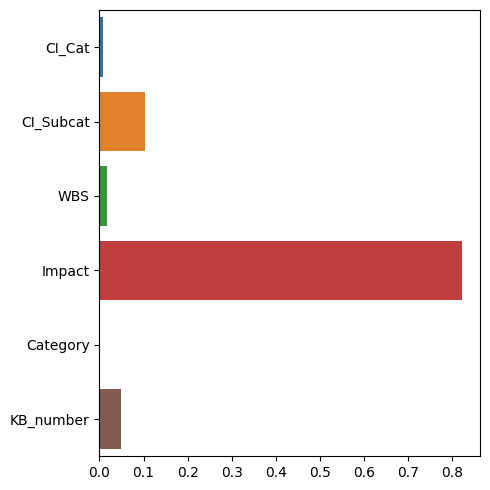

In [148]:
plt.figure(figsize=(5,5))
sns.barplot(x=rf.feature_importances_,y=X.columns)
plt.tight_layout()

# Conclusion:

#### After analysing all the metrics, we can conclude that `Linear regressor` and `SVC` are the best basic models for our task.
#### `Random Forest` is the best tree based model for this task.
#### As we have achieved good scored using basic models, we felt that there is no need of ensemble models.
#### `Impact` and `Sub Category` features are having high importance in predicting the target.

                                                  *****

# Task 2 : Forecasting
- Forcasting the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

In [149]:
## importing the data
d2 = df.copy()

In [150]:
d2.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Conv_Handle_Time
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,6,1,8256.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,10,1,1700.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,6,1,7370.900000


In [151]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   CI_Subcat                   46605 non-null  int64         
 2   WBS                         46605 non-null  int64         
 3   Status                      46605 non-null  int64         
 4   Impact                      46605 non-null  int64         
 5   Urgency                     46605 non-null  int64         
 6   Priority                    46605 non-null  int64         
 7   number_cnt                  46605 non-null  float64       
 8   Category                    46605 non-null  int64         
 9   KB_number                   46605 non-null  int64         
 10  No_of_Reassignments         46605 non-null  int64         
 11  Open_Time                   46605 non-null  datetime64

In [152]:
d2['Open_Time'][0]

Timestamp('2012-05-02 13:32:00')

In [153]:
d2 = d2.sort_values('Open_Time')

In [154]:
d2.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Conv_Handle_Time
11,1,57,88,0,4,4,4,0.291928,1,611,8,2012-01-10 10:49:00,2013-08-11 14:18:00,2013-08-11 14:22:00,10,1,13899.550000
12,1,57,55,0,4,4,4,0.776486,1,401,5,2012-02-10 12:12:00,2014-04-02 09:38:00,2014-04-02 09:38:00,10,2,18765.433333
9,1,57,55,0,4,4,4,0.306670,1,401,2,2012-03-09 16:04:00,2013-08-11 14:33:00,2013-08-11 14:35:00,4,1,12478.516667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,15722.616667
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,6,1,8256.316667


In [155]:
d2 = d2[['CI_Cat','Open_Time']]

In [156]:
d2['Open_Time'] = d2['Open_Time'].dt.date

In [157]:
d2['Open_Time'][0]

datetime.date(2012, 5, 2)

In [158]:
d2.head()

,CI_Cat,Open_Time
11,1,2012-01-10
12,1,2012-02-10
9,1,2012-03-09
2,1,2012-03-29
0,11,2012-05-02


In [159]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8,6),facecolor='white')   #canvas  size
# plt.plot(d2)    #line plot
# plt.tight_layout()

In [160]:
## Using pivot table to group the different lables of CI Category
pivot_table = d2.pivot_table(index='Open_Time', columns='CI_Cat', aggfunc='size')

In [161]:
pd.set_option('display.max_rows',None)
pivot_table

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-01-10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-09,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-29,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2012-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2012-07-12,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-17,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-15,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
## Converting pivot table to dataframe
d2 = pd.DataFrame(pivot_table)

In [163]:
d2.index=pd.to_datetime(d2.index)

In [164]:
## Filling the null values with zero
d2.fillna(0,inplace=True)

In [165]:
daily_data = d2.resample('D', closed='right', label='right').asfreq()

In [166]:
## Converting the daily data to quaterly data
monthly_data = daily_data.resample('M').sum()
monthly_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-01-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-31,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


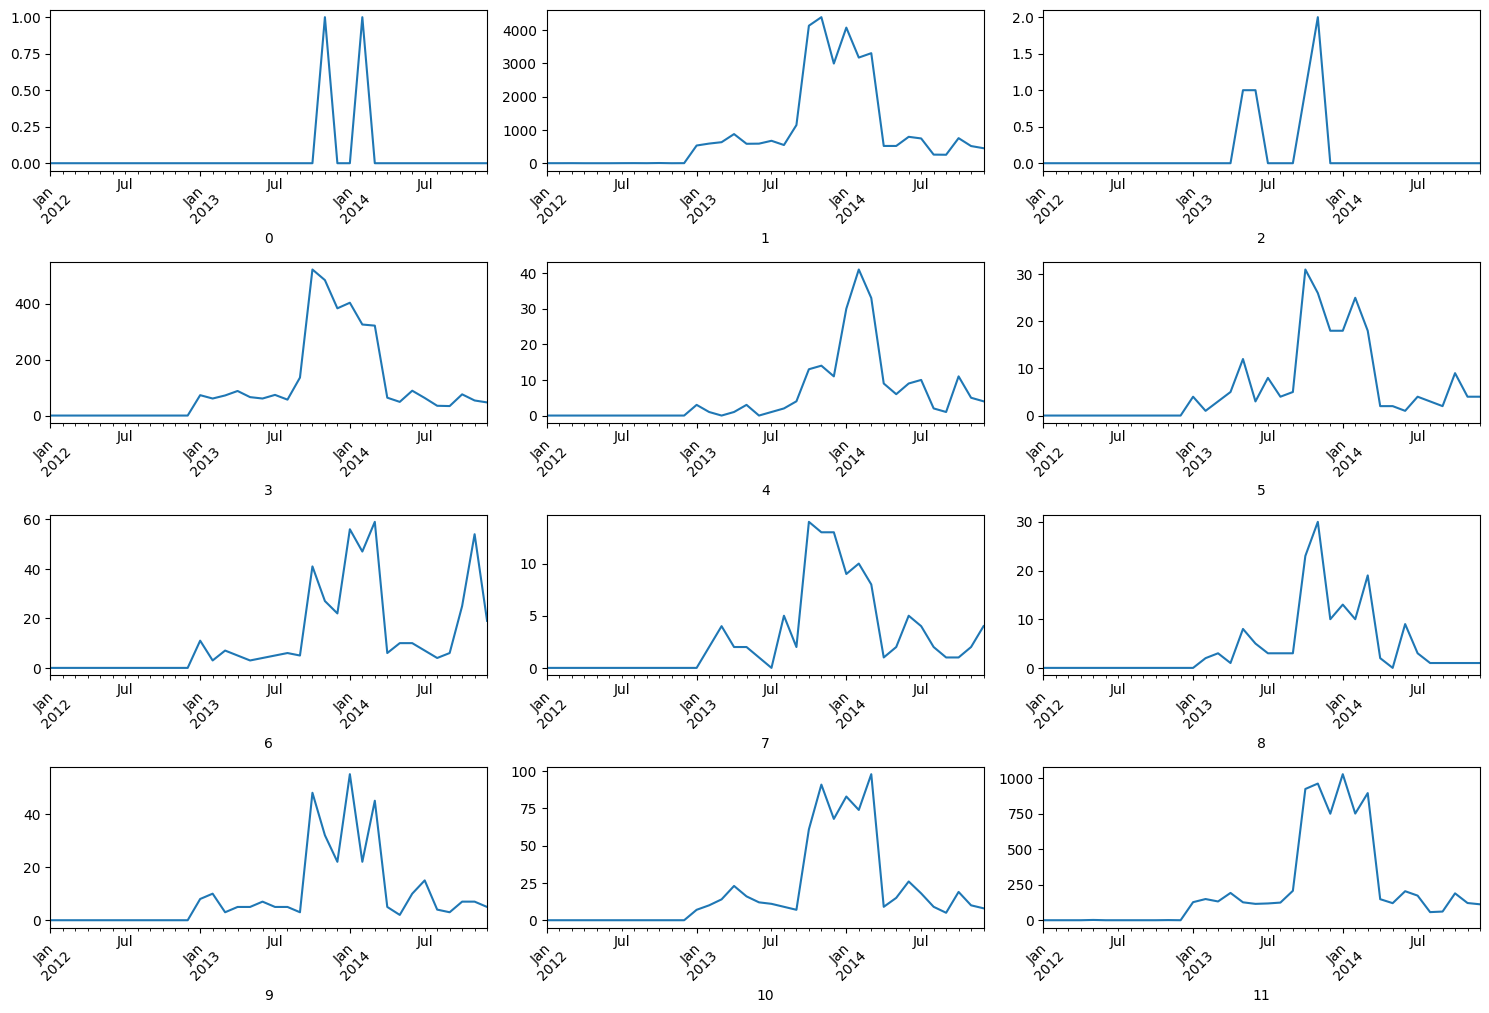

In [169]:
plt.figure(figsize=(15,12))
plotnumber =1
for i in monthly_data.columns:
  plt.subplot(5,3,plotnumber)
  monthly_data[i].plot()
  plt.xlabel(i)
  plt.xticks(rotation=45)
  plotnumber+=1
plt.tight_layout()

In [171]:
monthly_data.shape

(36, 12)

In [172]:
train_data = monthly_data[:30]
test_data= monthly_data[30:]

In [173]:
train_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-01-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-31,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
from statsmodels.tsa.stattools import adfuller

In [175]:
def perform_adf_test(data):

  stationary_cols=[]
  non_stationary_cols=[]

  for column in data.columns:

    result = adfuller(data[column])

    if result[1]<=0.05:
      print(f"{column} is stationary ")
    else:
      print(f"{column} is  not stationary ")

In [176]:
perform_adf_test(train_data.diff().diff().diff().dropna())

0 is stationary 
1 is stationary 
2 is stationary 
3 is stationary 
4 is  not stationary 
5 is stationary 
6 is stationary 
7 is stationary 
8 is  not stationary 
9 is stationary 
10 is stationary 
11 is  not stationary 


d=3

In [177]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [178]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

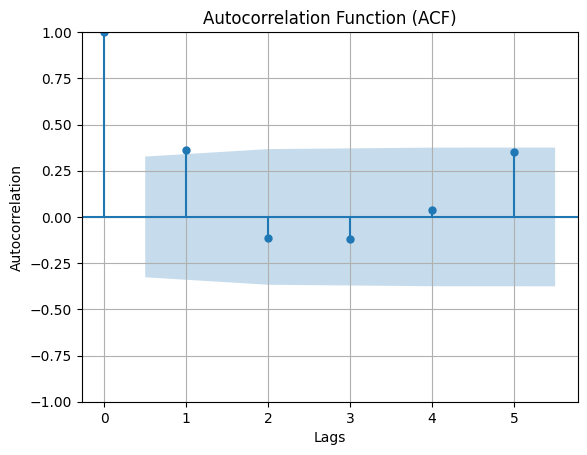

<Figure size 1200x600 with 0 Axes>

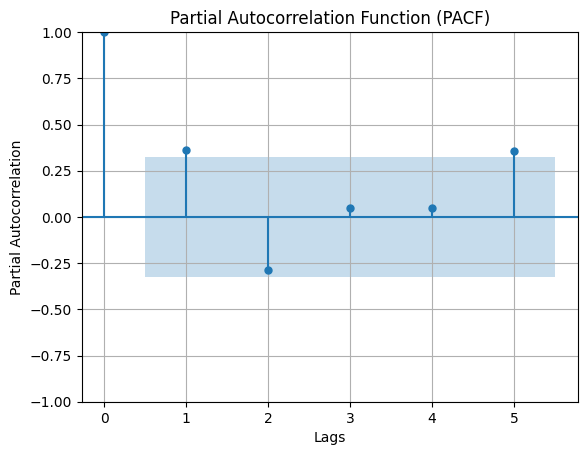

In [179]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(monthly_data[2], lags=5, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(monthly_data[2], lags=5, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

p=1,
q=1

## ARIMA model

In [180]:
#  Perform the forecasting for each column
arima_forecast = {}
steps = len(test_data)
models={i:[] for i in train_data}

for column in train_data.columns:
  model = ARIMA(train_data[column], order=(1,0,1)) # ARIMA(1, 2, 1) model
  a_model_fit = model.fit()
  models[column].append(a_model_fit)
  forecast = a_model_fit.forecast(steps=steps)
  arima_forecast[column] = forecast

In [181]:
pd.DataFrame(arima_forecast).astype(int)

,0,1,2,3,4,5,6,7,8,9,10,11
2014-07-31,0,848,0,96,7,2,10,4,7,9,23,202
2014-08-31,0,882,0,97,6,3,10,3,6,9,22,203
2014-09-30,0,908,0,98,6,4,10,3,5,9,22,204
2014-10-31,0,928,0,98,6,4,10,3,5,9,21,204
2014-11-30,0,944,0,99,6,5,10,3,4,9,21,205
2014-12-31,0,956,0,99,5,5,10,3,4,9,20,205


In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_errors=[]
mae_errors=[]
for i in train_data:
    y_pred = arima_forecast[i].values
    y_true = test_data[i]
    mse_errors.append(mean_squared_error(y_true, y_pred))
    mae_errors.append(mean_absolute_error(y_true, y_pred))

In [183]:
pred_df = pd.DataFrame(arima_forecast).astype(int)

In [184]:
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11
2014-07-31,0,848,0,96,7,2,10,4,7,9,23,202
2014-08-31,0,882,0,97,6,3,10,3,6,9,22,203
2014-09-30,0,908,0,98,6,4,10,3,5,9,22,204
2014-10-31,0,928,0,98,6,4,10,3,5,9,21,204
2014-11-30,0,944,0,99,6,5,10,3,4,9,21,205
2014-12-31,0,956,0,99,5,5,10,3,4,9,20,205


In [185]:
#  Perform the forecasting for each column
arima_forecast_future = {}
steps = 12
for column in train_data.columns:
    forecast_future = models[column][0].forecast(steps=steps)
    arima_forecast_future[column] = forecast_future

In [186]:
pred_future_df = pd.DataFrame(arima_forecast_future).astype(int)
pred_future_df

,0,1,2,3,4,5,6,7,8,9,10,11
2014-07-31,0,848,0,96,7,2,10,4,7,9,23,202
2014-08-31,0,882,0,97,6,3,10,3,6,9,22,203
2014-09-30,0,908,0,98,6,4,10,3,5,9,22,204
2014-10-31,0,928,0,98,6,4,10,3,5,9,21,204
2014-11-30,0,944,0,99,6,5,10,3,4,9,21,205
2014-12-31,0,956,0,99,5,5,10,3,4,9,20,205
2015-01-31,0,965,0,99,5,5,9,3,4,8,20,206
2015-02-28,0,972,0,100,5,5,9,3,4,8,20,206
2015-03-31,0,978,0,100,5,5,9,3,4,8,20,206
2015-04-30,0,982,0,100,5,5,9,3,4,8,19,206


In [187]:
test_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2014-07-31,0.0,743.0,0.0,63.0,10.0,4.0,7.0,4.0,3.0,15.0,18.0,173.0
2014-08-31,0.0,258.0,0.0,35.0,2.0,3.0,4.0,2.0,1.0,4.0,9.0,57.0
2014-09-30,0.0,254.0,0.0,34.0,1.0,2.0,6.0,1.0,1.0,3.0,5.0,61.0
2014-10-31,0.0,752.0,0.0,76.0,11.0,9.0,25.0,1.0,1.0,7.0,19.0,189.0
2014-11-30,0.0,515.0,0.0,54.0,5.0,4.0,54.0,2.0,1.0,7.0,10.0,121.0
2014-12-31,0.0,450.0,0.0,47.0,4.0,4.0,19.0,4.0,1.0,5.0,8.0,112.0


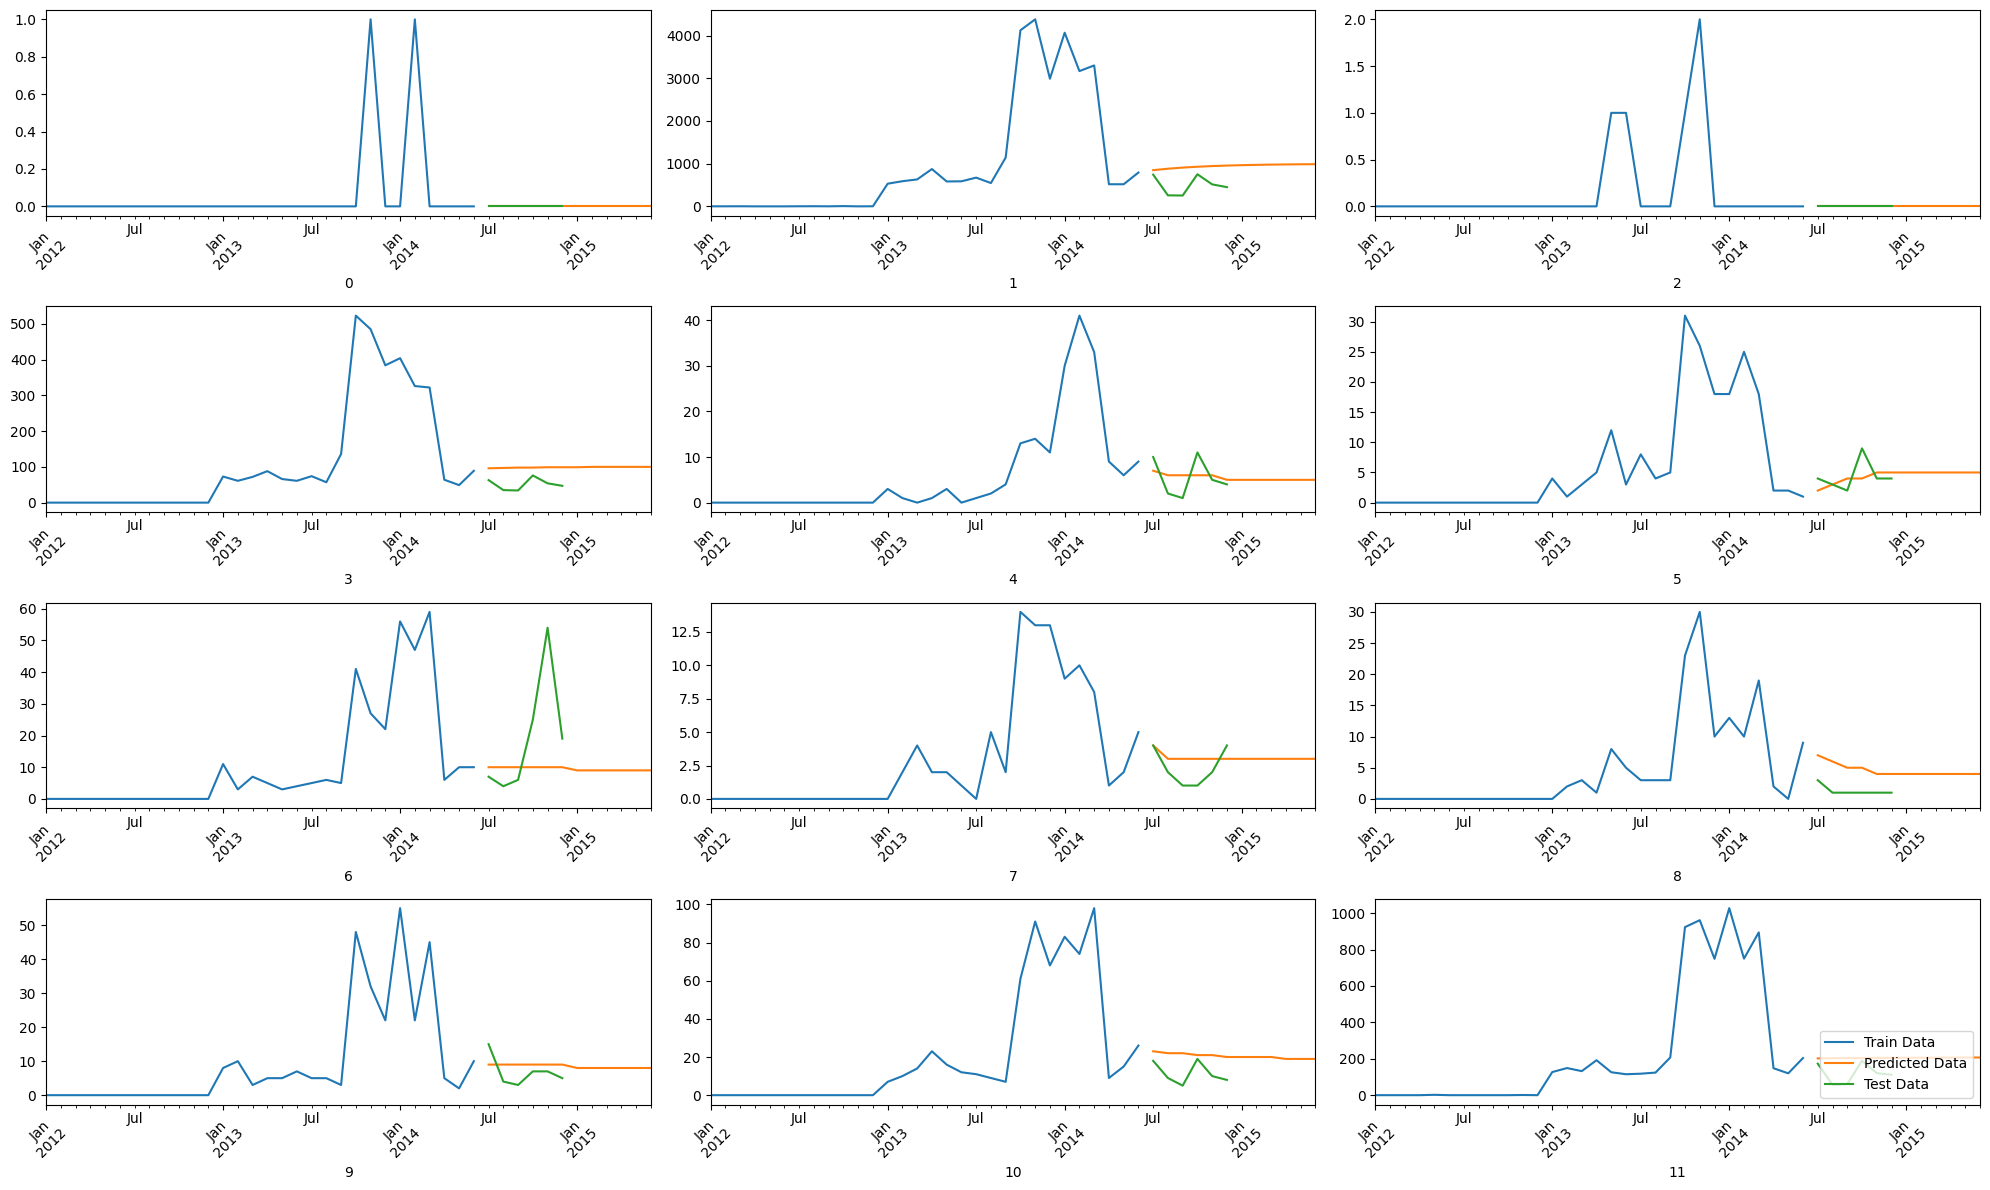

In [188]:
plt.figure(figsize=(20,12))
pl_no=1
# month_wise_past = train_data.resample('M').sum()
for i in train_data.columns:
    plt.subplot(4,3,pl_no)
    train_data[i].plot(label='Train Data')
    pred_future_df[i].plot(label='Predicted Data')
    test_data[i].plot(label='Test Data')
    plt.xlabel(i)
    plt.xticks(rotation=45)
    pl_no+=1
plt.tight_layout()
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

## SARIMAX model

In [189]:
sarima_forecast = {}
steps = len(test_data)
models_1={i:[] for i in train_data}
for column in train_data.columns:
  model = SARIMAX(train_data[column], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
  s_model_fit = model.fit()
  models_1[column].append(s_model_fit)
  forecast = s_model_fit.forecast(steps=steps)
  sarima_forecast[column] = forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [190]:
mse_errors_1=[]
mae_errors_1=[]
for i in train_data:
    y_pred = sarimax_forecast[i].values
    y_true = test_data[i]
    mse_errors_1.append(mean_squared_error(y_true, y_pred))
    mae_errors_1.append(mean_absolute_error(y_true, y_pred))

In [191]:
pred_df = pd.DataFrame.from_dict(sarima_forecast).astype(int)
pred_df


,0,1,2,3,4,5,6,7,8,9,10,11
2014-07-31,0,681,0,81,6,0,8,3,5,8,20,169
2014-08-31,0,580,0,67,4,0,7,3,4,7,17,146
2014-09-30,0,494,0,55,3,0,6,2,3,6,15,126
2014-10-31,0,420,0,45,2,0,5,2,3,5,12,109
2014-11-30,0,358,0,37,1,0,4,2,2,4,10,94
2014-12-31,0,305,0,31,1,0,3,1,2,4,9,81


In [192]:
#  Perform the forecasting for each column
sarima_forecast_future = {}
steps = 12
for column in train_data.columns:
    forecast_future = models_1[column][0].forecast(steps=steps)
    sarima_forecast_future[column] = forecast_future

In [193]:
pred_future_df = pd.DataFrame.from_dict(sarima_forecast_future).astype(int)

pred_future_df

,0,1,2,3,4,5,6,7,8,9,10,11
2014-07-31,0,681,0,81,6,0,8,3,5,8,20,169
2014-08-31,0,580,0,67,4,0,7,3,4,7,17,146
2014-09-30,0,494,0,55,3,0,6,2,3,6,15,126
2014-10-31,0,420,0,45,2,0,5,2,3,5,12,109
2014-11-30,0,358,0,37,1,0,4,2,2,4,10,94
2014-12-31,0,305,0,31,1,0,3,1,2,4,9,81
2015-01-31,0,259,0,25,0,0,3,1,2,3,7,70
2015-02-28,0,220,0,21,0,0,2,1,1,3,6,60
2015-03-31,0,187,0,17,0,0,2,1,1,3,5,52
2015-04-30,0,159,0,14,0,0,2,1,1,2,4,45


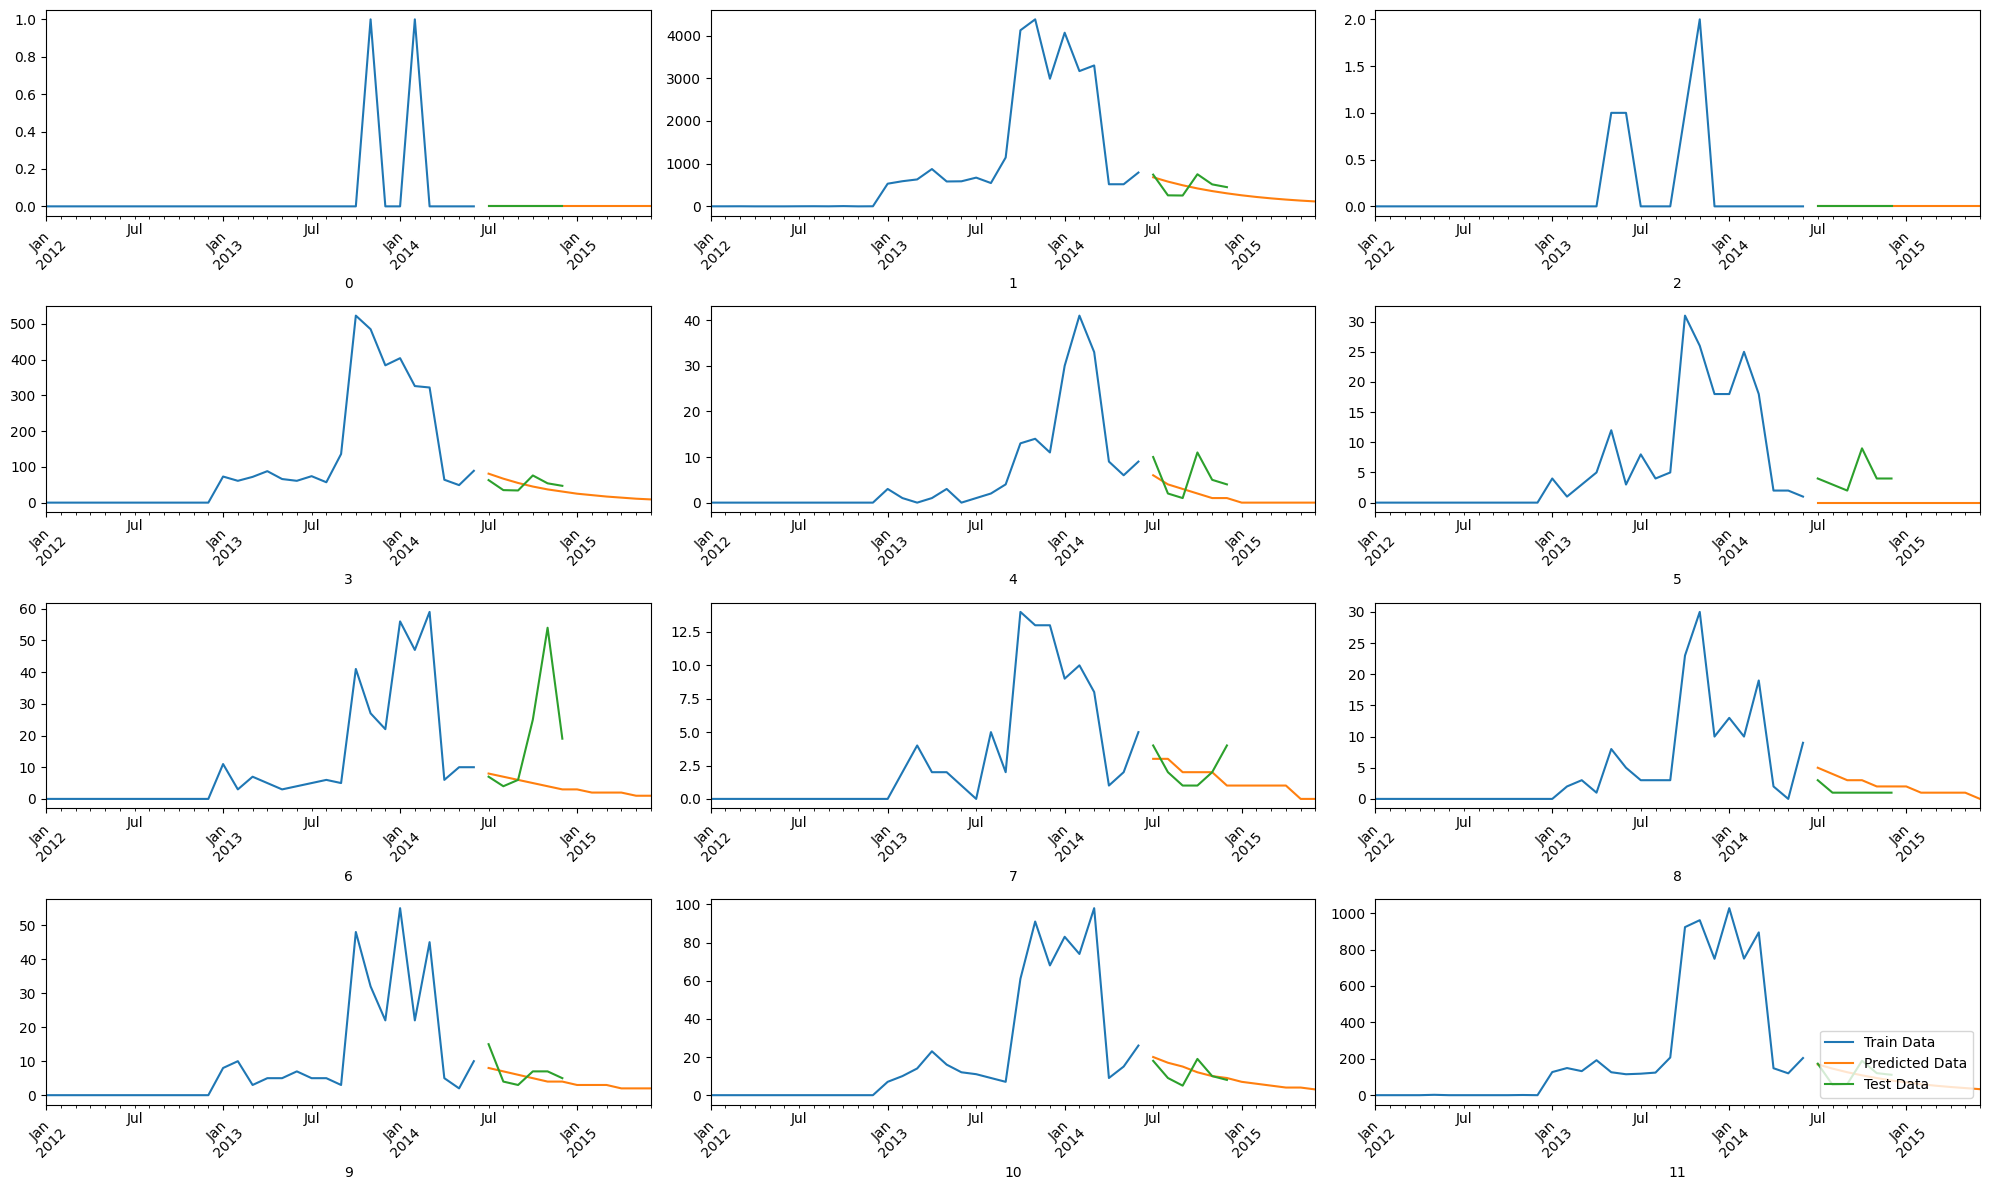

In [194]:
plt.figure(figsize=(20,12))
pl_no=1
# month_wise_past = train_data.resample('M').sum()
for i in train_data.columns:
    plt.subplot(4,3,pl_no)
    train_data[i].plot(label='Train Data')
    pred_future_df[i].plot(label='Predicted Data')
    test_data[i].plot(label='Test Data')
    plt.xlabel(i)
    plt.xticks(rotation=45)
    pl_no+=1
plt.tight_layout()
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [195]:
np.mean(mse_errors),np.mean(mae_errors)

(19122.81625870059, 49.00966146223917)

In [196]:
np.mean(mse_errors_1),np.mean(mae_errors_1)

(4827.844097897796, 26.231092214280153)

# Conclusion:

### From the metrics MSE and MAE, we can clearly say that `SARIMAX` model is performing well as compared to ARIMA model.

                                                  *****

# Task 3
Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced

In [197]:
d3 = d1.copy()

In [198]:
d3.head(2)

,CI_Cat,CI_Subcat,WBS,Impact,Priority,Category,KB_number
0,11,57,162,4,4,1,553
1,1,57,88,3,3,1,611


In [199]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CI_Cat     46605 non-null  int64
 1   CI_Subcat  46605 non-null  int64
 2   WBS        46605 non-null  int64
 3   Impact     46605 non-null  int64
 4   Priority   46605 non-null  int64
 5   Category   46605 non-null  int64
 6   KB_number  46605 non-null  int64
dtypes: int64(7)
memory usage: 3.9 MB


In [200]:
X = d3.drop(d3[['Priority']], axis=1)
y = d3['Priority']

## Splitting the data into train set and test set

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [202]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32623, 6)
(32623,)
(13982, 6)
(13982,)


## Scaling the data

In [203]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [204]:
X.head(3)

,CI_Cat,CI_Subcat,WBS,Impact,Category,KB_number
0,11,57,162,4,1,553
1,1,57,88,3,1,611
2,1,10,92,4,3,339


## Logistic Regressor

In [205]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [206]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   0    0    0    0    0]
 [   1  191    0    0    0]
 [   0   18 1562    3    0]
 [   0    0   33 7152    0]
 [   0    0    2   74 4946]]
classification report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.91      0.99      0.95       192
           3       0.98      0.99      0.98      1583
           4       0.99      1.00      0.99      7185
           5       1.00      0.98      0.99      5022

    accuracy                           0.99     13982
   macro avg       0.78      0.79      0.78     13982
weighted avg       0.99      0.99      0.99     13982



## K Nearest Neighbors Classifier

In [207]:
error_rate=[]
for i in range(1, 20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'error_rate')

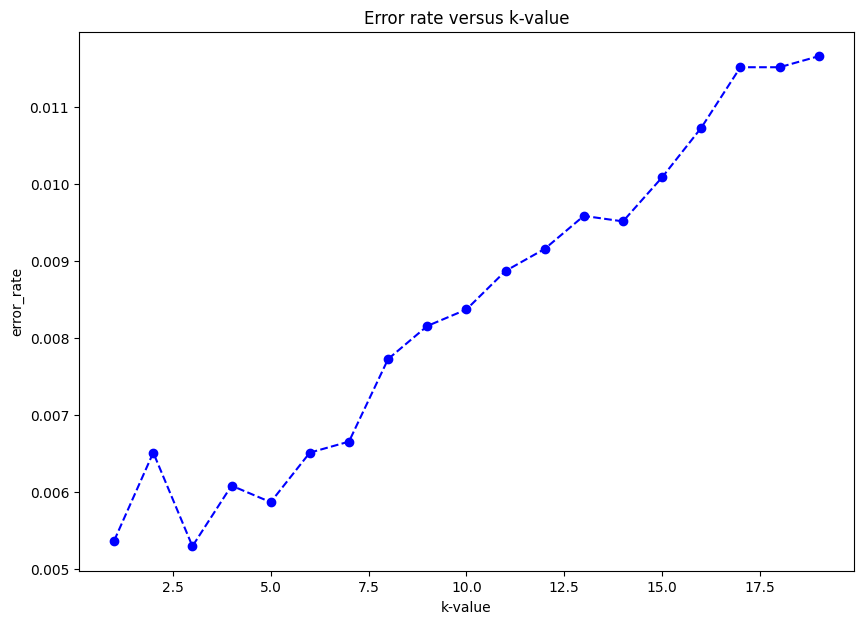

In [208]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [209]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)

In [210]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   0    0    0    0    0]
 [   1  204    0    0    0]
 [   0    4 1570   14    0]
 [   0    1   25 7193    5]
 [   0    0    2   22 4941]]
classification report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.98      1.00      0.99       205
           3       0.98      0.99      0.99      1588
           4       1.00      1.00      1.00      7224
           5       1.00      1.00      1.00      4965

    accuracy                           0.99     13982
   macro avg       0.79      0.79      0.79     13982
weighted avg       0.99      0.99      0.99     13982



## Support Vector Classifier

In [211]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_hat = svc.predict(X_train)
y_pred = svc.predict(X_test)

In [212]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   0    0    0    0    0]
 [   1  207    0    0    0]
 [   0    2 1562    3    0]
 [   0    0   33 7183   10]
 [   0    0    2   43 4936]]
classification report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.99      1.00      0.99       208
           3       0.98      1.00      0.99      1567
           4       0.99      0.99      0.99      7226
           5       1.00      0.99      0.99      4981

    accuracy                           0.99     13982
   macro avg       0.79      0.80      0.79     13982
weighted avg       0.99      0.99      0.99     13982



## Decision Tree Classifier

In [213]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [214]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   1    0    0    0    0]
 [   0  207    0    0    0]
 [   0    2 1575   16    0]
 [   0    0   20 7197    7]
 [   0    0    2   16 4939]]
classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.99      1.00      1.00       207
           3       0.99      0.99      0.99      1593
           4       1.00      1.00      1.00      7224
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.99      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Random Forest Classifier

In [215]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [216]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   0    0    0    0    0]
 [   1  207    0    0    0]
 [   0    2 1575   14    0]
 [   0    0   20 7197    2]
 [   0    0    2   18 4944]]
classification report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.99      1.00      0.99       208
           3       0.99      0.99      0.99      1591
           4       1.00      1.00      1.00      7219
           5       1.00      1.00      1.00      4964

    accuracy                           1.00     13982
   macro avg       0.79      0.80      0.79     13982
weighted avg       1.00      1.00      1.00     13982



## Gradient Bossting Classifier

In [217]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_hat = gb.predict(X_train)
y_pred = gb.predict(X_test)

In [218]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   1    0    0    0    0]
 [   0  206    0    0    0]
 [   0    2 1565    1    0]
 [   0    1   30 7208    2]
 [   0    0    2   20 4944]]
classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.99      1.00      0.99       206
           3       0.98      1.00      0.99      1568
           4       1.00      1.00      1.00      7241
           5       1.00      1.00      1.00      4966

    accuracy                           1.00     13982
   macro avg       0.99      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## X Gradient Bossting Classifier

In [219]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)

y_hat = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [220]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

metrics on test data 

confusion matrix: 
 [[   1    0    0    0    0]
 [   0  206    0    0    0]
 [   0    2 1565    1    0]
 [   0    1   30 7208    2]
 [   0    0    2   20 4944]]
classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.99      1.00      0.99       206
           3       0.98      1.00      0.99      1568
           4       1.00      1.00      1.00      7241
           5       1.00      1.00      1.00      4966

    accuracy                           1.00     13982
   macro avg       0.99      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



## Evaluation Summary:

In [221]:
# creating a dictionary
dict = {"Model":["Logistic Regressor","KNN","SVC","Decision Tree","Random Forest","Gradient Boosting","XGradient Boosting"],
      "Accuracy":[0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
      "Precision":[0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
      "Recall":[0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
      "F1 Score":[0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
      "Total Misclassifications":[131, 74, 94, 63, 59, 58, 57]}

In [222]:
scores = pd.DataFrame(dict)

In [223]:
score = scores.sort_values(by="Total Misclassifications")
score

,Model,Accuracy,Precision,Recall,F1 Score,Total Misclassifications
6,XGradient Boosting,1.00,1.00,1.00,1.00,57
5,Gradient Boosting,1.00,1.00,1.00,1.00,58
4,Random Forest,1.00,1.00,1.00,1.00,59
3,Decision Tree,1.00,1.00,1.00,1.00,63
1,KNN,0.99,0.99,0.99,0.99,74
2,SVC,0.99,0.99,0.99,0.99,94
0,Logistic Regressor,0.99,0.99,0.99,0.99,131


In [224]:
## Feature impotances in decision tree
dt.feature_importances_

array([1.01983325e-04, 3.05291281e-03, 7.93039155e-03, 9.78854498e-01,
       9.79143074e-05, 9.96230029e-03])

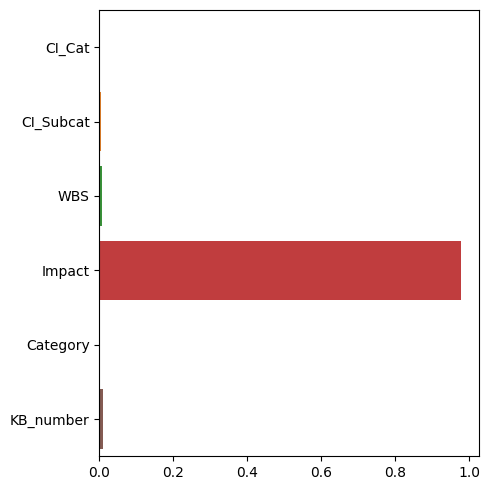

In [225]:
plt.figure(figsize=(5,5))
sns.barplot(x=dt.feature_importances_,y=X.columns)
plt.tight_layout()

In [226]:
## Feature importances in random forest
rf.feature_importances_

array([0.00803747, 0.02950073, 0.05601827, 0.77607853, 0.09072318,
       0.03964181])

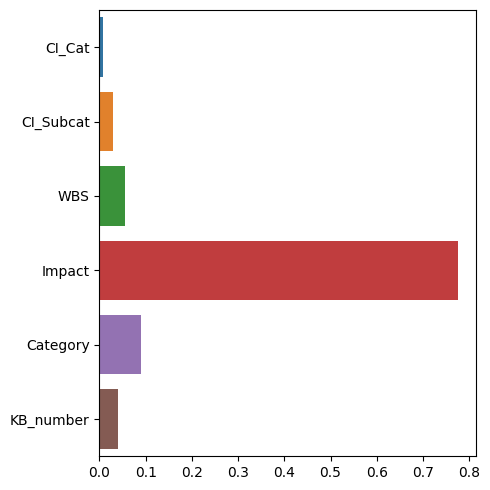

In [227]:
plt.figure(figsize=(5,5))
sns.barplot(x=rf.feature_importances_,y=X.columns)
plt.tight_layout()

# Conclusion:

### After comparing all the models, we can conclude that `XG Boost`,`Gradient boost` and `Random Forest` are the best models for this patricular task.

# Task 4:
- Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

### The target variable for this particular task is `No_of_Related_Changes`.
###  However, as the target feature contains 98.79% of missing values and as imputing those missing values with any of the methods won't make any sense, we have removed the column in the early stage.
### Hence we belief that the given data is not sufficient for this particular task.

                                                 *****